In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X.shape, y.shape

((442, 10), (442,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

### Create Onw Class for Multiple Regression

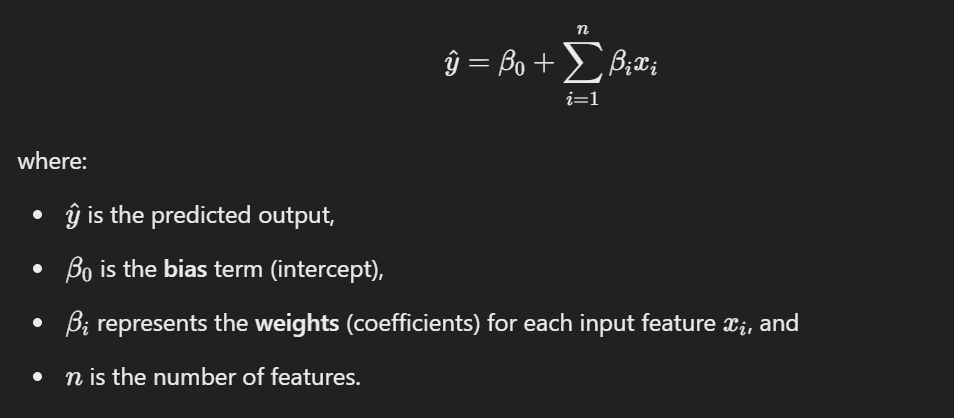

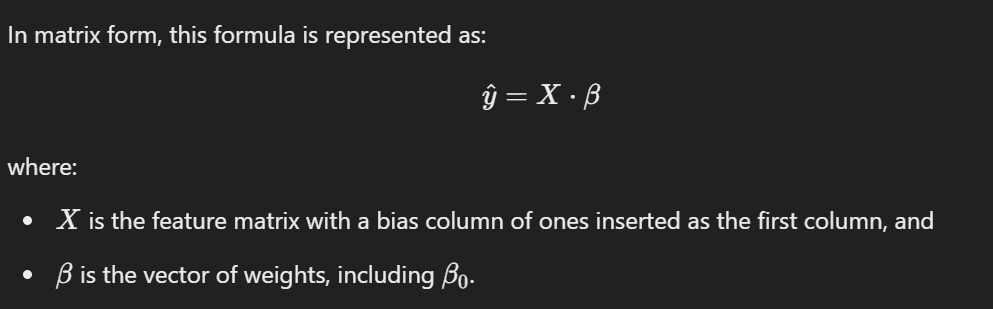

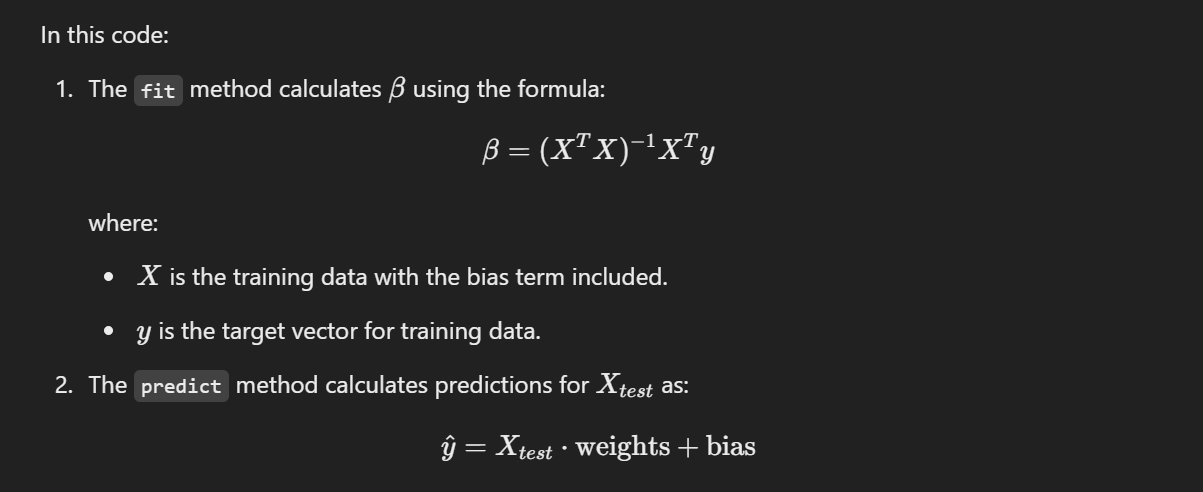

In [61]:
class OnwClass:
    def __init__(self):
        # Initialize weights and bias to None
        '''
        `self.weights` will represent the slope(s) of the regression line for each feature
        `self.bias` will represent the intercept of the regression line
        '''
        self.weights = None  # slope
        self.bias = None     # intercept

    def fit(self, X_train, y_train):
        # Convert X_train to a NumPy array if it’s a Series, then reshape if one-dimensional
        X_train = X_train.values if isinstance(X_train, pd.Series) else X_train
        X_train = X_train.reshape(-1, 1) if X_train.ndim == 1 else X_train
        
        # Add a bias term (column of ones) to X_train for the intercept
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculate weights (betas) using the normal equation: (X^T * X)^-1 * X^T * y
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.bias = betas[0]       # First value is the intercept
        self.weights = betas[1:]   # Remaining values are the slopes

    def predict(self, X_test):
        # Convert X_test to a NumPy array if it’s a Series, then reshape if one-dimensional
        X_test = X_test.values if isinstance(X_test, pd.Series) else X_test
        X_test = X_test.reshape(-1, 1) if X_test.ndim == 1 else X_test
        
        
        # Predict y using the model: y_pred = X_test @ weights + bias
        y_pred = X_test @ self.weights + self.bias
        print(y_pred)
        return y_pred


In [41]:
X_train.T @ X_train

np.float64(8041.095600000001)

In [42]:
np.dot(X_train.T, X_train)

np.float64(8041.095600000001)

In [11]:
lr = OnwClass()

In [12]:
lr.fit(X_train, y_train)

In [13]:
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.45260276297191904

In [15]:
lr.weights

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [16]:
lr.bias

np.float64(151.34560453986)

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('placement.csv')

In [19]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [20]:
X = df['cgpa']
y = df['package']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160,), (40,), (160,), (40,))

In [62]:
mara_lr = OnwClass()

In [63]:
mara_lr.fit(X_train, y_train)

In [64]:
y_pred = mara_lr.predict(X_test)

[2.78031348 3.13635249 3.1995207  2.38981908 3.52684689 3.76803461
 3.16506531 2.54486832 3.17655044 3.4923915  1.90744364 2.34962112
 3.6876387  2.75734322 3.47516381 3.04447145 2.32665086 3.20526327
 2.17734418 3.314372   2.45298729 2.90090734 3.32011456 2.87219451
 3.33734226 2.19457187 1.41932564 2.7114027  3.18229301 2.32665086
 3.74506435 2.95833298 3.68189614 2.97556068 2.59080884 3.34882738
 2.47595755 3.07318428 4.17575671 2.95833298]


In [65]:
y_pred.shape

(40,)

In [67]:
X_test.shape

(40,)

In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7730984312051736

In [69]:
mara_lr.weights

array([0.57425647])

In [70]:
mara_lr.bias

np.float64(-1.0270069374541464)

In [76]:
([6.63] @ mara_lr.weights) + mara_lr.bias

np.float64(2.780313476559543)

[1.59734514 1.626406   1.65546686 1.68452772 1.71358857 1.74264943
 1.77171029 1.80077115 1.82983201 1.85889286 1.88795372 1.91701458
 1.94607544 1.97513629 2.00419715 2.03325801 2.06231887 2.09137973
 2.12044058 2.14950144 2.1785623  2.20762316 2.23668402 2.26574487
 2.29480573 2.32386659 2.35292745 2.38198831 2.41104916 2.44011002
 2.46917088 2.49823174 2.52729259 2.55635345 2.58541431 2.61447517
 2.64353603 2.67259688 2.70165774 2.7307186  2.75977946 2.78884032
 2.81790117 2.84696203 2.87602289 2.90508375 2.9341446  2.96320546
 2.99226632 3.02132718 3.05038804 3.07944889 3.10850975 3.13757061
 3.16663147 3.19569233 3.22475318 3.25381404 3.2828749  3.31193576
 3.34099661 3.37005747 3.39911833 3.42817919 3.45724005 3.4863009
 3.51536176 3.54442262 3.57348348 3.60254434 3.63160519 3.66066605
 3.68972691 3.71878777 3.74784862 3.77690948 3.80597034 3.8350312
 3.86409206 3.89315291 3.92221377 3.95127463 3.98033549 4.00939635
 4.0384572  4.06751806 4.09657892 4.12563978 4.15470063 4.183761

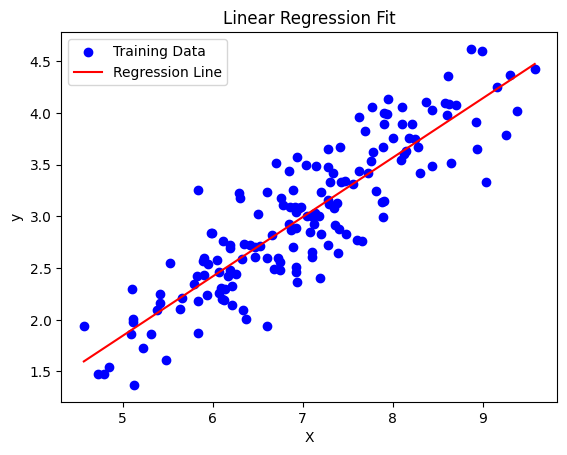

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of X values for a smooth line
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  # 100 points from min to max of X_train

# Predict y values using the model
y_pred_line = mara_lr.predict(X_range)  # Use the model to predict over X_range

# Plot the original data points
plt.scatter(X_train, y_train, color="blue", label="Training Data")

# Plot the predicted line
plt.plot(X_range, y_pred_line, color="red", label="Regression Line")

# Add labels and title for clarity
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [100]:
import numpy as np
import matplotlib.pyplot as plt

def plot_linear_prediction_detailed(X_train, y_train, model):
    """
    Detailed visualization of linear regression showing bias, weight, and line
    
    Parameters:
    -----------
    X_train : array-like
        Training input features
    y_train : array-like
        Training target values
    model : object
        Model with .bias and .weights attributes
    """
    plt.figure(figsize=(12, 7), dpi=100)
    
    # Flatten X_train if needed
    X_train = X_train.values if isinstance(X_train, pd.Series) else X_train
    X_train = X_train.reshape(-1, 1) if X_train.ndim == 1 else X_train
    
    # Generate prediction line
    X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    y_pred_line = model.predict(X_line)
    
    # Plot original training data
    plt.scatter(X_train, y_train, color='navy', alpha=0.7, label='Training Data')
    
    # Plot prediction line
    plt.plot(X_line, y_pred_line, color='crimson', linewidth=2, label='Prediction Line')
    
    # Highlight bias (intercept)
    plt.scatter(0, model.bias, color='green', s=200, label='Bias (Intercept)', zorder=5)
    
    # Demonstrate slope (weight)
    # Choose a point at X=1 to show slope effect
    x_slope = 1
    y_slope = model.bias + model.weights[0] * x_slope
    plt.scatter(x_slope, y_slope, color='purple', s=200, label='Slope Point', zorder=5)
    
    # Draw rise/run triangle to illustrate slope
    plt.plot([0, 0], [model.bias, y_slope], color='orange', linestyle='--', linewidth=2)  # Vertical line (rise)
    plt.plot([0, x_slope], [y_slope, y_slope], color='orange', linestyle='--', linewidth=2)  # Horizontal line (run)
    plt.plot([0, x_slope], [model.bias, y_slope], color='orange', linewidth=2)  # Hypotenuse
    
    # Annotate key points and measurements
    plt.annotate(f'Bias: {model.bias:.2f}', 
                 xy=(0, model.bias), 
                 xytext=(-1, model.bias+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.annotate(f'Slope: {model.weights[0]:.2f}', 
                 xy=(x_slope, y_slope), 
                 xytext=(x_slope+0.5, y_slope+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.annotate('Rise (Δy)', 
                 xy=(0.2, (model.bias + y_slope)/2), 
                 color='orange')
    
    plt.annotate('Run (Δx)', 
                 xy=(0.5, y_slope), 
                 color='orange')
    
    plt.title(f'Linear Regression: y = {model.bias:.2f} + {model.weights[0]:.2f}x', fontsize=12)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



[1.59734514 1.626406   1.65546686 1.68452772 1.71358857 1.74264943
 1.77171029 1.80077115 1.82983201 1.85889286 1.88795372 1.91701458
 1.94607544 1.97513629 2.00419715 2.03325801 2.06231887 2.09137973
 2.12044058 2.14950144 2.1785623  2.20762316 2.23668402 2.26574487
 2.29480573 2.32386659 2.35292745 2.38198831 2.41104916 2.44011002
 2.46917088 2.49823174 2.52729259 2.55635345 2.58541431 2.61447517
 2.64353603 2.67259688 2.70165774 2.7307186  2.75977946 2.78884032
 2.81790117 2.84696203 2.87602289 2.90508375 2.9341446  2.96320546
 2.99226632 3.02132718 3.05038804 3.07944889 3.10850975 3.13757061
 3.16663147 3.19569233 3.22475318 3.25381404 3.2828749  3.31193576
 3.34099661 3.37005747 3.39911833 3.42817919 3.45724005 3.4863009
 3.51536176 3.54442262 3.57348348 3.60254434 3.63160519 3.66066605
 3.68972691 3.71878777 3.74784862 3.77690948 3.80597034 3.8350312
 3.86409206 3.89315291 3.92221377 3.95127463 3.98033549 4.00939635
 4.0384572  4.06751806 4.09657892 4.12563978 4.15470063 4.183761

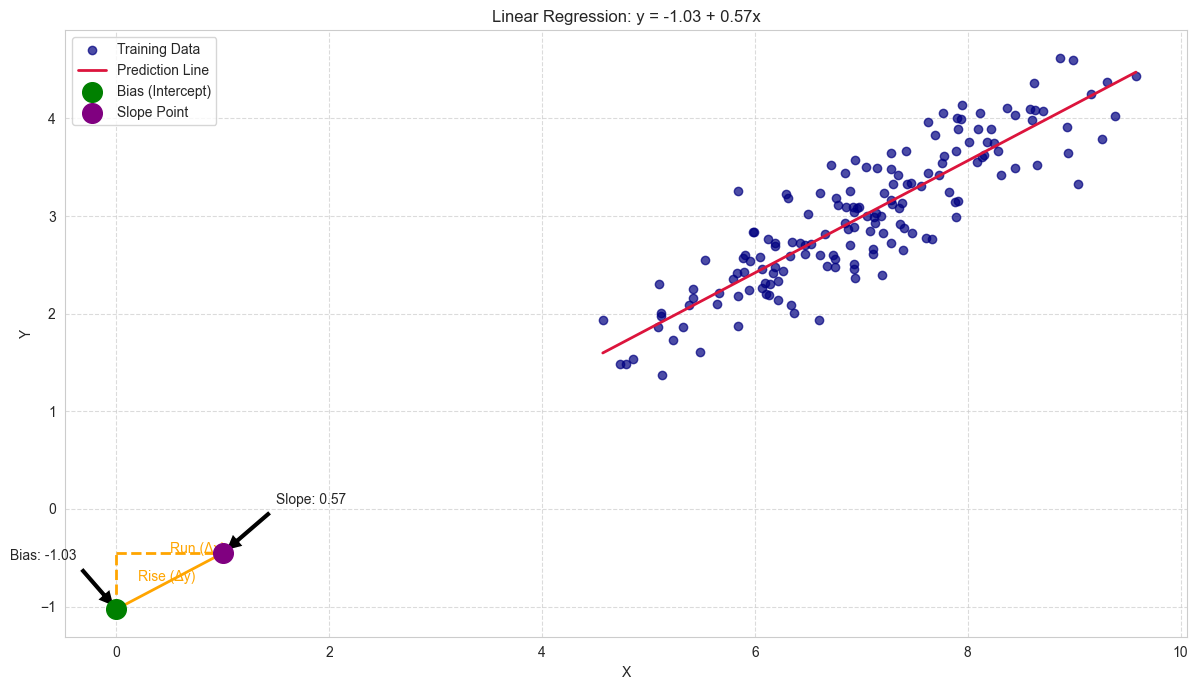

In [102]:
# Example usage (commented out)
plot_linear_prediction_detailed(X_train, y_train, mara_lr)